## 1. Simplicial complex from pairwise data
This recipe show you how to create a simplicial complex by flagging the cliques ($k$-cliques are promoted to simplices of order $k-1$).

In [44]:
import networkx as nx

import xgi

In [45]:
G = nx.barabasi_albert_graph(n=100, m=2, seed=1)
H = xgi.flag_complex_d2(G)

print(H)

Unnamed SimplicialComplex with 100 nodes and 219 simplices


## 2. Laplacian spectrum
This recipe allows you write the multiorder Laplacian of a hypergraph. It also shows how to compute the eigenvalues and eigenvectors and how to plot the Laplacian spectrum.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eigh

import xgi

In [47]:
H = xgi.random_hypergraph(n=100, ps=[0.2, 0.02], seed=1)

/Users/yyu8dx/Documents/GitHub/xgi/xgi/generators/random.py:152: UserWarning: This method is much slower than fast_random_hypergraph
  warn("This method is much slower than fast_random_hypergraph")


In [48]:
orders = np.array(xgi.unique_edge_sizes(H)) - 1
L_multi = xgi.multiorder_laplacian(H, orders=orders, weights=[1] * len(orders))
eivals, eivects = eigh(L_multi)

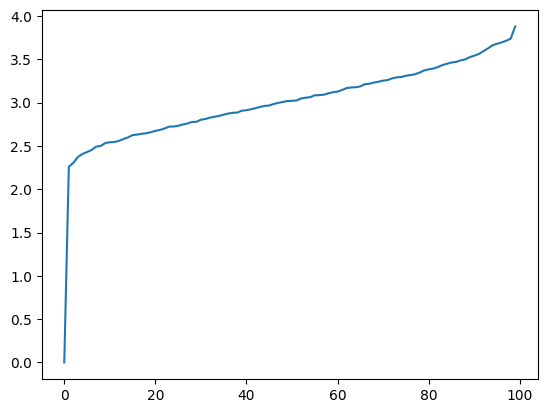

In [49]:
plt.plot(eivals);

## 3. Adjacency tensor
This recipe shows you how to retrieve the adjacency tensor at a given order of a hypergraph.

In [50]:
from itertools import permutations

import xgi


def adjacency_tensor(H, order):
    N = H.num_nodes
    shape = tuple([N] * (order + 1))
    tensor = np.zeros(shape)

    edges = H.edges.filterby("order", order)
    for id, members in edges.members(dtype=dict).items():
        for idcs in permutations(members):
            tensor[idcs] = 1

    return tensor

In [51]:
print(adjacency_tensor(H, 1).shape)
print(adjacency_tensor(H, 2).shape)

(100, 100)
(100, 100, 100)


## 4. Create random hypergraph
This recipe allows you to create a random hypergraph. It then shows you how to print a short summary of the hypergraph.

In [52]:
import xgi

N = 50  # number of nodes
ps = [0.5, 0.2, 0.1]  # probabilities of edges of each order

H = xgi.random_hypergraph(N, ps)

print(H)

Unnamed Hypergraph with 50 nodes and 27588 hyperedges


## 5. Clean-up
This recipe shows you how to remove singletons, isolated nodes, multiedges from your hypergraph dataset, this is achieved with the `cleanup` function that also relabels your nodes and edges with integer labels.

In [53]:
import xgi

H_enron = xgi.load_xgi_data("email-enron")
print(H_enron)

Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [54]:
H_enron.cleanup()
print(H_enron)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


## 6. Add two hypergraphs
This recipe allows you to add two hypergraphs. This is done by merging the two hypergraphs and then removing the duplicate instances of edges.

In [55]:
import xgi

H1 = xgi.Hypergraph([[1, 2, 3], [3, 4]])
H2 = xgi.Hypergraph([[1, 2], [3, 4], [4, 5, 6]])
# create an hypergraph by merging H1 and H2
H_res = H1 << H2
# remove duplicated edges
H_res.merge_duplicate_edges()
# print the nodes and edges in order to see that everything is correct
print(H_res.nodes)
print(H_res.edges.members())

[1, 2, 3, 4, 5, 6]
[{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}]


## 7. Filterby
This recipe shows you how to filter nodes and edges of a hypergraph based on the values of some statistics.

In [56]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
# filter the nodes of degree 2 and print them
print(H.nodes.filterby("degree", 2))
# filter the edges of size 2 and print them
print(H.edges.filterby("size", 2).members())

[1, 2, 3, 4]
[{1, 2}, {3, 4}]


## 8. Plot a hypergraph showing one order only
This recipe shows you how to plot a hypergraph showing only the edges of a certain order.

In [57]:
import xgi

H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}])
pos = xgi.barycenter_spring_layout(H, seed=1)

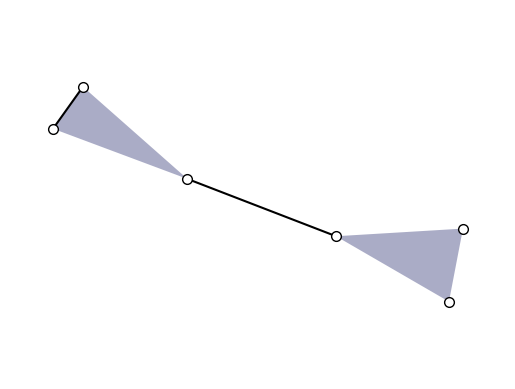

In [58]:
# plot it with all orders
xgi.draw(H, pos);

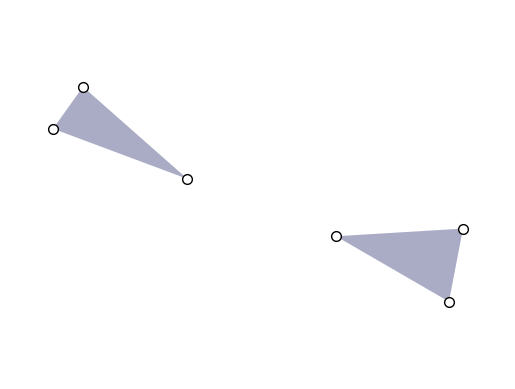

In [59]:
# plot only edges of order 2
H_order_2 = xgi.subhypergraph(H, edges=H.edges.filterby("order", 2))
xgi.draw(H_order_2, pos=pos);

## 9. Plot with stats
This recipe shows you how use the statistics of a hypergraph when plotting it. In this case we modify the size of the nodes according to their degree.

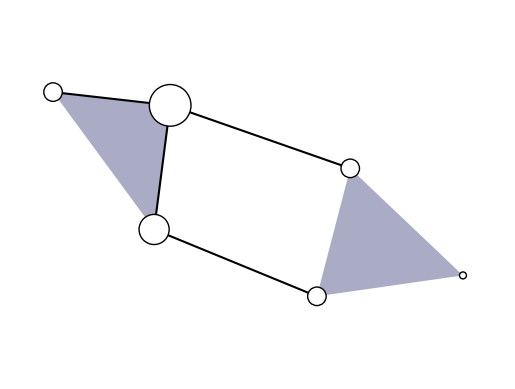

In [60]:
H = xgi.Hypergraph([{1, 2, 3}, {1, 2}, {4, 5, 6}, {3, 4}, {1, 5}, {1, 3}])
pos = xgi.barycenter_spring_layout(H, seed=1)
# plot with node size corresponding to the degree
xgi.draw(H, pos, node_size=H.nodes.degree);

## 10. Merging multiedges
This recipe allows you to merge multiedges in a hypergraph. It also shows how to visualize the multiplicity distibution for the edges.

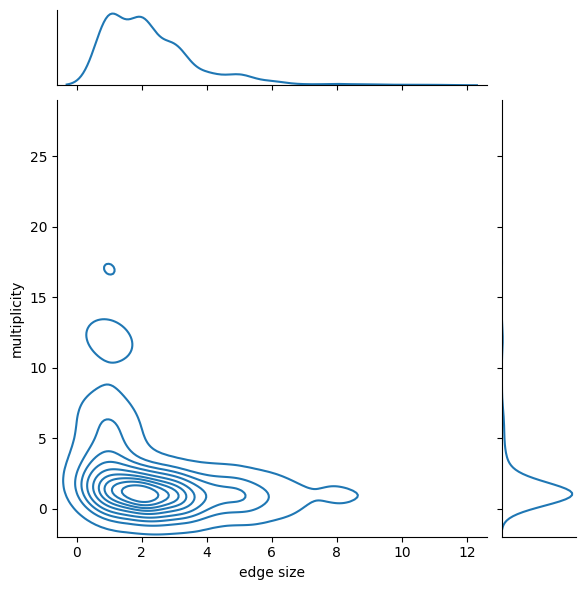

In [61]:
import pandas as pd
import seaborn as sns

import xgi

H = xgi.load_xgi_data("diseasome")
H.merge_duplicate_edges(rename="tuple", multiplicity="weight")

edge_size = H.edges.size.asnumpy()
multiplicity = H.edges.attrs("weight").asnumpy()
df = pd.DataFrame.from_dict(
    {
        "edge size": H.edges.size.aslist(),
        "multiplicity": H.edges.attrs("weight", missing=1).aslist(),
    }
)

g = sns.jointplot(data=df, x="edge size", y="multiplicity", kind="kde")
sns.despine()

## 11. Degree distribution
This recipe shows how to plot the degree distribution of a hypergraph in different layouts.

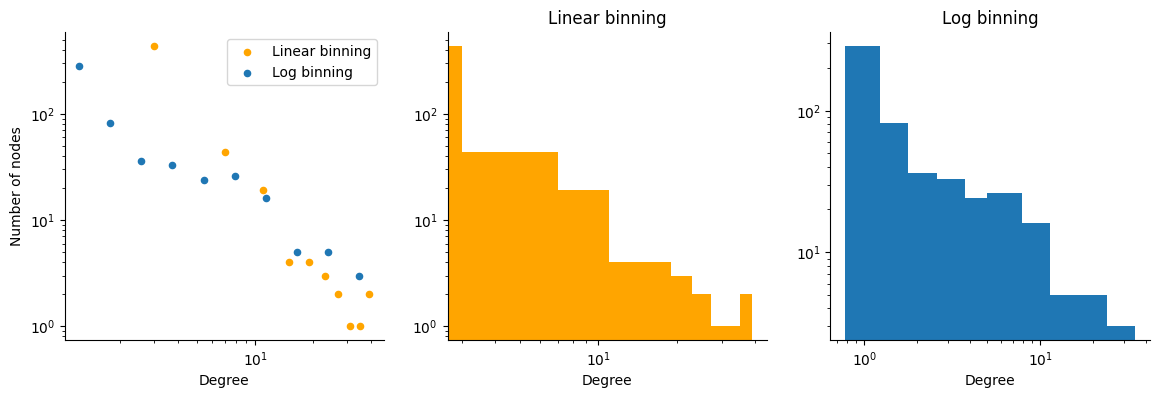

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import xgi

H = xgi.load_xgi_data("diseasome")
df1 = H.nodes.degree.ashist(bin_edges=True)
df2 = H.nodes.degree.ashist(bin_edges=True, log_binning=True)

plt.figure(figsize=(14, 4))
plt.subplot(131)
df1.plot(
    "bin_center",
    "value",
    ax=plt.gca(),
    logx=True,
    logy=True,
    kind="scatter",
    color="orange",
    label="Linear binning",
)
df2.plot(
    "bin_center",
    "value",
    ax=plt.gca(),
    logx=True,
    logy=True,
    kind="scatter",
    label="Log binning",
)
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.legend()
sns.despine()

plt.subplot(132)
plt.title("Linear binning")
plt.bar(df1.bin_lo, df1.value, width=df1.bin_hi - df1.bin_lo, log=True, color="orange")
plt.xscale("log")
plt.xlabel("Degree")
sns.despine()

plt.subplot(133)
plt.title("Log binning")
plt.bar(df2.bin_lo, df2.value, width=df2.bin_hi - df2.bin_lo, log=True)
plt.xscale("log")
plt.xlabel("Degree")
sns.despine()

plt.show()

## 12. Multilayer visualization of a hypergraph
This recipe shows how to plot the [multilayer visualization](https://xgi.readthedocs.io/en/stable/api/drawing/xgi.drawing.draw.html#xgi.drawing.draw.draw_multilayer) of a hypergraph. This plotting function diplays higher-order structes in 3D showing hyperedges/simplices of different orders on superimposed layers.

/Users/yyu8dx/Documents/GitHub/xgi/xgi/generators/random.py:152: UserWarning: This method is much slower than fast_random_hypergraph
  warn("This method is much slower than fast_random_hypergraph")


(<Axes3D: >,
 (<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x31aa1b440>,
  <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x31aa1a6c0>))

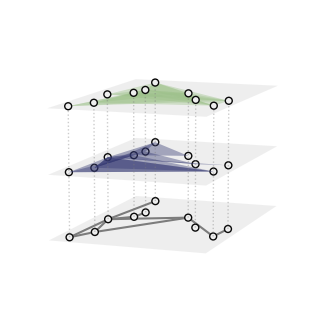

In [63]:
import matplotlib.pyplot as plt

import xgi

H = xgi.random_hypergraph(n=10, ps=[0.2, 0.05, 0.05], seed=1)

_, ax = plt.subplots(figsize=(4, 4), subplot_kw={"projection": "3d"})
xgi.draw_multilayer(H, ax=ax)

## 13. Specifying the colours of hyperedges
This recipe will show how to construct a hypergraph and specify the colours of the different hyperedges. There are three options to do it.
First of all we create the hypergraph and specify the colors we want to use. 

In [64]:
import xgi

links = [[1, 2], [1, 3], [5, 6], [1, 7]]
triangles = [[3, 5, 7], [2, 7, 1], [6, 10, 15]]
squares = [[7, 8, 9, 10]]
pentagons = [[1, 11, 12, 13, 14]]
edges = links + triangles + squares + pentagons

H = xgi.Hypergraph(edges)
pos = xgi.barycenter_spring_layout(H, seed=2)

link_color = "#000000"
triangle_color = "#648FFF"
square_color = "#785EF0"
pentagon_color = "#DC267F"
colors = [link_color, triangle_color, square_color, pentagon_color]

**Option 1:** input colors that are lists/arrays with the right number of elements in the right order

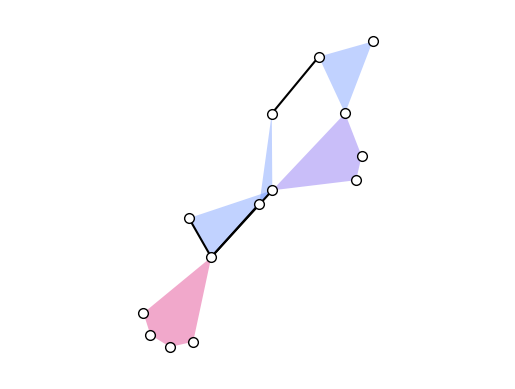

In [65]:
edge_color = [colors[i - 2] for i in H.edges.filterby("order", 1, "gt").size.aslist()]

xgi.draw(H, pos=pos, dyad_color=link_color, edge_fc=edge_color);

**Option 2:** a dictionary where keys are hyperedge ids and values are colours:

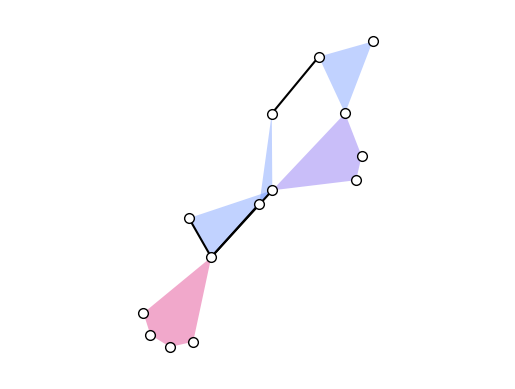

In [66]:
color_dict = {idx: colors[i - 2] for idx, i in H.edges.size.asdict().items()}

xgi.draw(H, pos=pos, dyad_color=color_dict, edge_fc=color_dict);

**Option 3:** just create a cmap that has the colours you want. This works in this case because the edges are already plotted with colors corresponding to their size. This option also allows to show an associated colorbar.

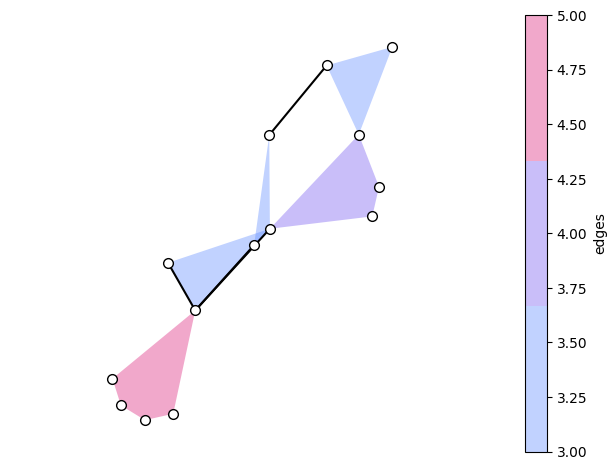

In [67]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(colors[1:])

_, (node_collection, dyad_collection, edge_collection) = xgi.draw(
    H, pos=pos, dyad_color=link_color, edge_fc_cmap=cmap
)

plt.colorbar(edge_collection, label="edges")

plt.tight_layout()

## 14. Flag a triangular lattice
This recipe shows how you can create a simplicial complex object by randomly flagging a triangular lattice generated using [NetworkX](https://networkx.org/documentation/stable/reference/generated/networkx.generators.lattice.triangular_lattice_graph.html#networkx.generators.lattice.triangular_lattice_graph).
This recipe uses the `xgi.flag_complex_d2()` (see [documentation](https://xgi.readthedocs.io/en/stable/api/generators/xgi.generators.simplicial_complexes.html#xgi.generators.simplicial_complexes.flag_complex_d2)) function, but needs a small trick to levarage the way nodes are encoded in the NetworkX function to plot correctly the lattice.

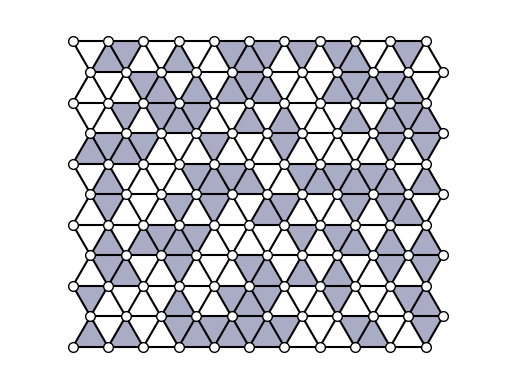

In [68]:
import networkx as nx

import xgi

m, n = 10, 20
p = 0.5

G = nx.triangular_lattice_graph(m, n, with_positions=True)
pos = nx.get_node_attributes(G, "pos")

mapping = {i: list(G.nodes)[i] for i in range(0, len(list(G.nodes)))}
inv_mapping = {v: k for k, v in mapping.items()}

G_aux = nx.relabel_nodes(G, inv_mapping)
S = xgi.flag_complex_d2(G_aux, p2=p)

pos = {inv_mapping[k]: v for k, v in pos.items()}
xgi.draw(S, pos=pos);

## 14. Compute the average path length in a hypergraph
This recipe shows how to compute the average path length in a hypergraph.
You can compute all shortest path lengths with `xgi.shortest_path_length()` (see [documentation](https://xgi.readthedocs.io/en/stable/api/algorithms/xgi.algorithms.shortest_path.html#xgi.algorithms.shortest_path.shortest_path_length)). 
The `xgi.shortest_path_length()` function returns an infinite length for disconnected nodes. 
To allow the computation of the average path length in any case we replace `np.inf` with 0 for disconnected nodes and remove length-0 paths for self-loops.

In [69]:
import numpy as np

import xgi

H = xgi.random_hypergraph(n=100, ps=[0.2, 0.02], seed=1)
N = H.num_nodes
spl = xgi.shortest_path_length(H)

lens = []
for tup in spl:
    lens += tup[1].values()

# remove lengths 0 for self-loops
lens = [i for i in lens if i != 0]

# replace inf by 0 for disconnected nodes
lens = [0 if i == np.inf else i for i in lens]

avg_shortest_path = np.sum(lens) / (N * (N - 1))
print("The average shortest path length is", avg_shortest_path)

The average shortest path length is 1.1171717171717173


## 16. Get all of the node IDs that have maximum degree
This recipe demonstrates how to get all of the indices corresponding to the maximum degree, because `argmax` only returns the first index corresponding to the maximal value.

In [70]:
import xgi

H = xgi.Hypergraph([[1, 2, 3, 4], [1, 2, 3], [1, 2]])

[k for k, v in H.degree().items() if v == H.nodes.degree.max()]

[1, 2]

## 17. Get all the node IDs corresponding to the 100th largest degree
The `argsort` method allows us to access the node IDs by their statistical rank. Here we get the 100th largest degree and find all the node IDs that share that degree.

In [71]:
import xgi

H = xgi.load_xgi_data("email-enron")
ids = H.nodes.degree.argsort()
i = ids[-100]
d = H.degree()[i]
matching_ids = [k for k, v in H.degree().items() if v == d]
print(f"Nodes {', '.join(matching_ids)} have degree {d}")

Nodes 98, 64 have degree 49


## 18. Define a custom filtering function

In addition to the pre-defined filtering functionality, one can also define a custom comparison operator to compare statistics and attributes.

First, we show an example for numerical statistics and second, an example for attributes.

**Numerical statistics**

In [72]:
import xgi

outsiderange = lambda val, arg: arg[0] > val or val > arg[1]

H = xgi.load_xgi_data("email-enron")
print(f"The total number of nodes is {H.num_nodes}")

# Get all of nodes that have degree less than 3 or greater than 20
nodes = H.nodes.filterby("degree", [3, 20], mode=outsiderange)
print(f"The number of nodes with degree less than 3 or greater than 20 is {len(nodes)}")

The total number of nodes is 148
The number of nodes with degree less than 3 or greater than 20 is 128


**Attributes**

In [73]:
import datetime

import xgi

date1 = datetime.datetime(2000, 1, 1)
date2 = datetime.datetime(2001, 1, 1)
datecompare = (
    lambda date, arg: arg[0] <= datetime.datetime.fromisoformat(date) <= arg[1]
)

H = xgi.load_xgi_data("email-enron")
print(f"The total number of hyperedges is {H.num_edges}")

# Get all of the dates between 01JAN2000 and 01JAN2001
e = H.edges.filterby_attr("timestamp", [date1, date2], mode=datecompare)
print(f"The number of hyperedges between 01JAN2000 and 01JAN2001 is {len(e)}")

The total number of hyperedges is 10885
The number of hyperedges between 01JAN2000 and 01JAN2001 is 3992


## 19. Plot many hypergraphs using the same nodal positions

It can be desirable to plot many hypergraphs with different color schemes or subsets of the original hypergraph, but with the same node positions.

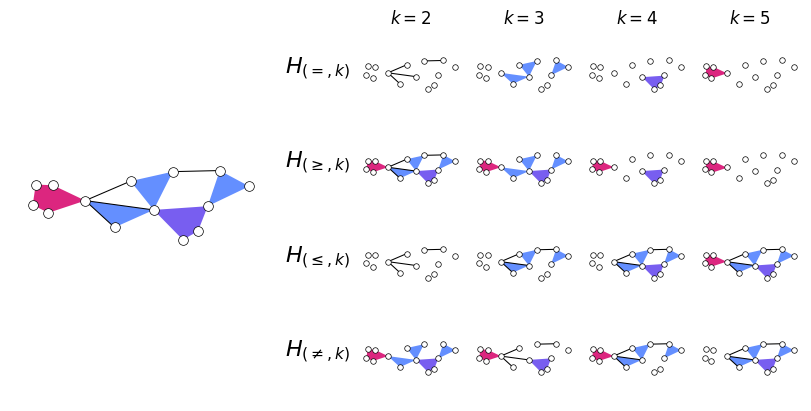

In [74]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

import xgi

link_color = "#000000"
triangle_color = "#648FFF"
square_color = "#785EF0"
pentagon_color = "#DC267F"
colors = [link_color, triangle_color, square_color, pentagon_color]


def color_edges(H):
    return [colors[i - 2] for i in H.edges.filterby("order", 1, "gt").size.aslist()]


links = [[1, 2], [1, 3], [5, 6], [1, 7]]
triangles = [[3, 5, 7], [2, 7, 1], [6, 10, 15]]
squares = [[7, 8, 9, 10]]
pentagons = [[1, 11, 12, 13, 14]]
edges = links + triangles + squares + pentagons
H = xgi.Hypergraph(edges)

# This computes the positions used for all of the subplots
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=3))

filtering_parameters = np.arange(
    H.edges.size.min(), H.edges.size.max() + 1, 1, dtype=int
)

uniform_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "eq")).copy()
    for k in filtering_parameters
]
geq_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "geq")).copy()
    for k in filtering_parameters
]
leq_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "leq")).copy()
    for k in filtering_parameters
]
exclusion_filtering = [
    xgi.subhypergraph(H, edges=H.edges.filterby("size", k, "neq")).copy()
    for k in filtering_parameters
]
filterings = [uniform_filtering, geq_filtering, leq_filtering, exclusion_filtering]

fig = plt.figure(layout="constrained", figsize=(8, 4))

gs_leftright = gridspec.GridSpec(1, 3, figure=fig, wspace=0.075)
gs_panels = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=gs_leftright[1:])

ax_left = fig.add_subplot(gs_leftright[0])
xgi.draw(
    H,
    pos=pos,
    ax=ax_left,
    edge_fc=color_edges(H),
    node_size=7,
    node_lw=0.5,
    dyad_lw=0.75,
    alpha=1,
)

labels = [r"$H_{(=, k)}$", r"$H_{(\geq, k)}$", r"$H_{(\leq, k)}$", r"$H_{(\neq, k)}$"]

for i, j in itertools.product(range(4), repeat=2):
    ax = fig.add_subplot(gs_panels[i, j])
    ec = color_edges(filterings[i][j])
    xgi.draw(
        filterings[i][j],
        pos=pos,
        ax=ax,
        node_size=4,
        dyad_lw=0.75,
        node_lw=0.5,
        edge_fc=ec,
        alpha=1,
    )
    if i == 0:
        ax.set_title(rf"$k={j + 2}$")

    if j == 0:
        ax.text(-3.5, 0, labels[i], fontsize=16)
plt.show()

## 20. Cut a hypergraph to a maximum order

This recipe demonstrates how to create a hypergraph with edges smaller or equal than a certain order.

In [75]:
import xgi

H = xgi.load_xgi_data("email-enron")
max_order = 3
print(
    f"The unique edge orders of the original hypergraph are: \n {H.edges.order.aspandas().unique()}"
)
cutH = xgi.cut_to_order(H, max_order)
print(
    f"The unique edge orders of the cut hypergraph are: \n {cutH.edges.order.aspandas().unique()}"
)
print("We can also remove isolated nodes, by additionally using the cleanup method.")
cutH2 = cutH.cleanup(
    isolates=False, singletons=True, multiedges=True, relabel=False, in_place=False
)
print(f"With isolated nodes, the hypergraph has {cutH.num_nodes} nodes.")
print(f"Without isolated nodes, the hypergraph has {cutH2.num_nodes} nodes.")

The unique edge orders of the original hypergraph are: 
 [ 4  1  2  7  0  3  5 10  6  8  9 14 15 11 12 35 17 36]
The unique edge orders of the cut hypergraph are: 
 [1 2 0 3]
We can also remove isolated nodes, by additionally using the cleanup method.
With isolated nodes, the hypergraph has 148 nodes.
Without isolated nodes, the hypergraph has 142 nodes.


# 21. Find the community labels of nodes for a given number of clusters

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x1369646e0>,
  <matplotlib.collections.PatchCollection at 0x1369be360>))

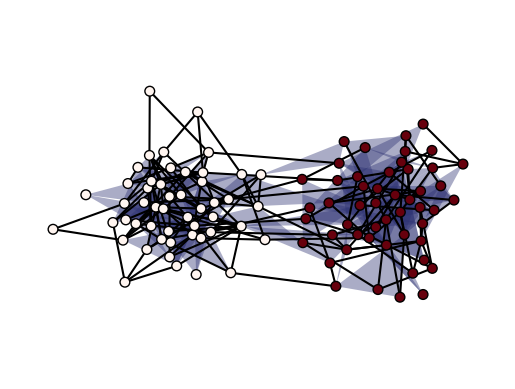

In [8]:
import xgi
H = xgi.uniform_HPPM(100, 2, 3, 0.9, seed=0) << xgi.uniform_HPPM(100, 3, 2, 0.9, seed=0)
H.cleanup()

node_labels = xgi.spectral_clustering(H, k=2, max_iter=100, seed=None)
H.set_node_attributes(node_labels, "group")

pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=0))
xgi.draw(H, pos=pos, node_fc=H.nodes.attrs("group"))